<a href="https://colab.research.google.com/github/IndraniMandal/CSC310-S20/blob/master/16a_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/Shared drives/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Regression Trees

In regression we predict **values** rather than discrete labels.

In the simplest case we want to fit a line through the points (simple linear regression). A straight-line is a model of the form

$y=mx+b$

where m is commonly known as the slope, and b is commonly known as the intercept.

## Linear Regression

Slope: 2.00
Intercept: -0.56


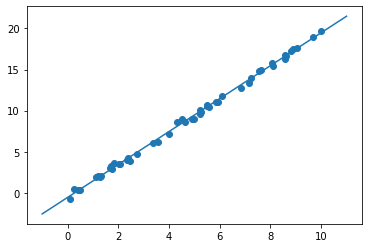

R^2 score: 1.00


In [1]:
import matplotlib.pyplot as plt
import random
import pandas

# generate the data - a noisy line of points
m = 2
b = -1
x = pandas.DataFrame([10 * random.random() for __ in range(50)])
y = m * x + b + pandas.DataFrame([random.random() for __ in range(50)])

# linear regression model                                                                                                         
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
print("Slope: {:3.2f}".format(model.coef_[0][0]))
print("Intercept: {:3.2f}".format(model.intercept_[0]))

# plot the model together with the data                                                                              
xfit = pandas.DataFrame([i for i in range(-1, 12)])
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

# compute the R^2 score
rs = model.score(x,y)
print("R^2 score: {:3.2f}".format(rs))

## Non-linear Regression

Best parameters: {'max_depth': 7}
R^2 score: 0.99


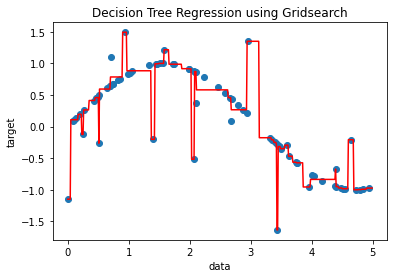

In [2]:
# Import the necessary modules and libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16)) # noise every 5th point

# setting up grid search
model = model = DecisionTreeRegressor()
param_grid = {'max_depth': list(range(1,25))}
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# Predict
rs_score = grid.best_estimator_.score(X,y)
print("R^2 score: {:3.2f}".format(rs_score))

# Plot the results
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test_model = grid.best_estimator_.predict(X_test)
plt.figure()
plt.scatter(X, y)
plt.plot(X_test, y_test_model, "r-")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression using Gridsearch")
plt.show()

## Another Look at the $R^2$ Score
The $R^2$ score is a score that compares the errors squared of the regression model to the errors squared of a default model.

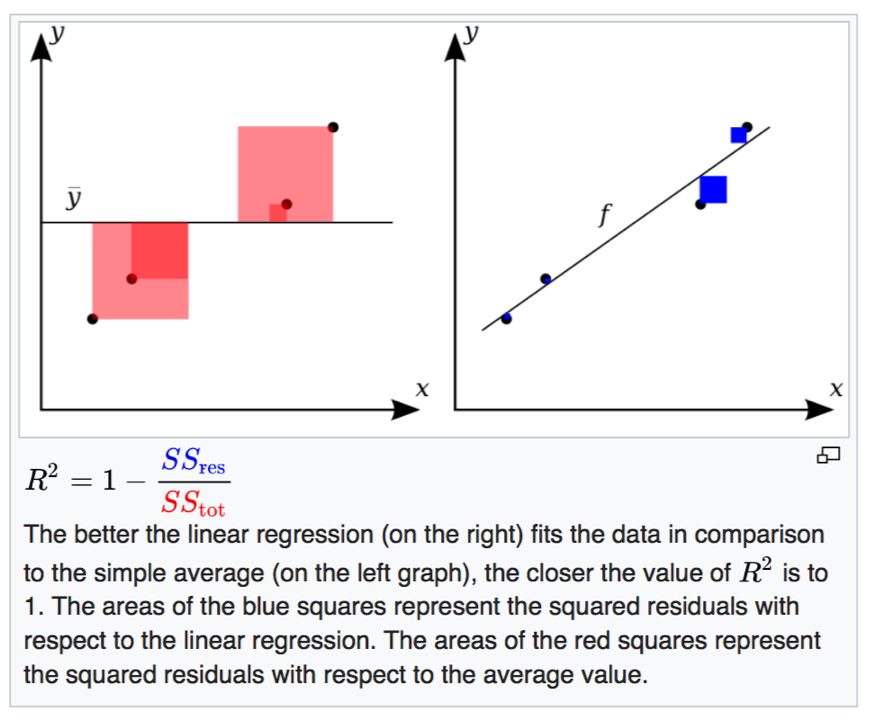

More information at [Wikipedia]("https://en.wikipedia.org/wiki/Coefficient_of_determination").

## Regression in General
Turns out that all the classification models we have covered so far also support regression models:

* Regression Trees
* KNN Regression Models
* MLP Regression Models

## Regression Trees

# K-NN Regression

## Linear Regression

Choose a number for k: 3
R^2 score: 1.00


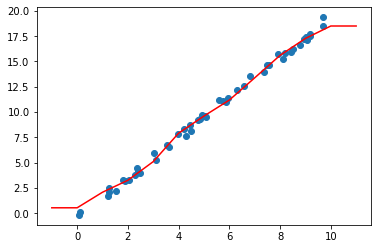

In [ ]:
# generate the data
import matplotlib.pyplot as plt
import random
import pandas
n  = int(input('Choose a number for k: '))

x = pandas.DataFrame([10 * random.random() for __ in range(50)])
y = 2 * x - 1 + pandas.DataFrame([random.random() for __ in range(50)])

# pick model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=n)
model.fit(x, y)

# compute the R^2 score
print("R^2 score: {0:.2f}".format(model.score(x,y)))

# plot the model together with the data
xfit = pandas.DataFrame([i for i in range(-1, 12)])
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit, "r-")
plt.show()

## Non-linear Regression

R^2 score: 0.75


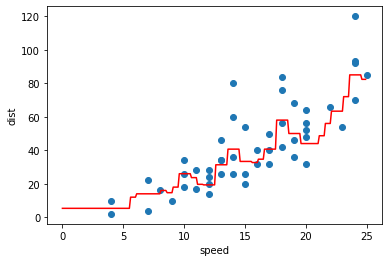

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas

# get our dataset
cars_df = pandas.read_csv(notes_home+"assets/cars.csv")

# pick model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(cars_df['speed'].values.reshape(-1,1),cars_df['dist'])

# plot the model ontop of the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

x_ticks = np.arange(0,25.0,0.1)
y_ticks = model.predict(x_ticks.reshape(-1, 1))
plt.plot(x_ticks,y_ticks,"r-")

# compute the R^2 score 
rs = model.score(cars_df['speed'].values.reshape(-1,1),cars_df['dist'])
print("R^2 score: {:3.2f}".format(rs))

## MLP Regression

## Linear Regression

Choose a number for hidden nodes: 20


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 score: 1.00


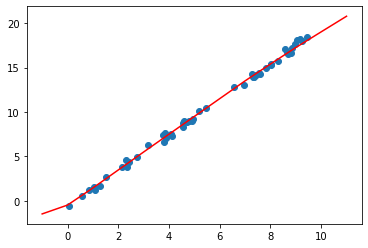

In [13]:
# generate the data
import matplotlib.pyplot as plt
import random
import pandas

n  = int(input('Choose a number for hidden nodes: '))

X = pandas.DataFrame([10 * random.random() for __ in range(50)])
y = 2 * X - 1 + pandas.DataFrame([random.random() for __ in range(50)])

# pick model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(n,),
                     activation='relu', max_iter=10000)
model.fit(X, y)

# compute the R^2 score
print("R^2 score: {0:.2f}".format(model.score(X,y)))

# plot the model together with the data
Xfit = pandas.DataFrame([i for i in range(-1, 12)])
yfit = model.predict(Xfit)
plt.scatter(X, y)
plt.plot(Xfit, yfit, "r-")
plt.show()


## Non-linear Regression

R^2 score: 0.79


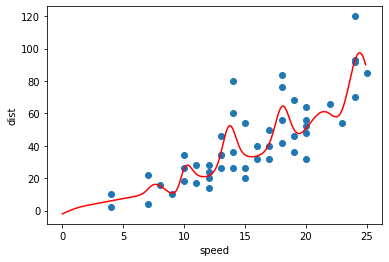

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas

# get our dataset
cars_df = pandas.read_csv(notes_home+"assets/cars.csv")

# pick model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', max_iter=50000)
model.fit(cars_df['speed'].values.reshape(-1,1),cars_df['dist'])

# plot the model ontop of the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

x_ticks = np.arange(0,25.0,0.1)
y_ticks = model.predict(x_ticks.reshape(-1, 1))
plt.plot(x_ticks,y_ticks,"r-")

# compute the R^2 score 
rs = model.score(cars_df['speed'].values.reshape(-1,1),cars_df['dist'])
print("R^2 score: {:3.2f}".format(rs))

## Regression and Grid Search - KNN Regression
Just like in classification, regression models are built using a small sample of a possibly infinite data universe and we have to estimate the model parameters for the best model using this small sample...that means we have to perform a grid search over parameter ranges and we want to use cross-validation to minimize the bias of any one particular training-test split of the data.

Let's try this with KNN regression.

Best parameters: {'n_neighbors': 5}
R^2 score: 0.74 (0.62, 0.86)


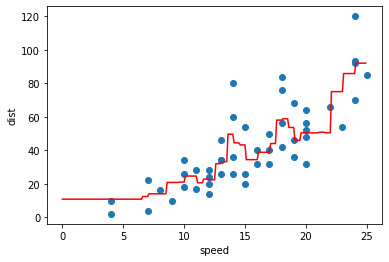

In [12]:
# Import the necessary modules and libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from assets.confint import regression_confint

# get our dataset
cars_df = pandas.read_csv(notes_home+"assets/cars.csv")
X = cars_df['speed'].values.reshape(-1,1)
y = cars_df['dist']

# setting up grid search
model = KNeighborsRegressor()
param_grid = {'n_neighbors': list(range(1,11))}
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# plot the best model ontop of the data
plt.scatter(cars_df['speed'],cars_df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')

best_model = grid.best_estimator_
x_ticks = np.arange(0,25.0,0.1)
y_ticks = best_model.predict(x_ticks.reshape(-1, 1))
plt.plot(x_ticks,y_ticks,"r-")

# compute the R^2 score and CI of the best model
rs = best_model.score(cars_df['speed'].values.reshape(-1,1),cars_df['dist'])
obs = cars_df.shape[0]
vars = 1
lb, ub = regression_confint(rs, obs, vars)
print("R^2 score: {:3.2f} ({:3.2f}, {:3.2f})".format(rs,lb,ub))